## **MNIST AI Class Practice**

## Prepare Data

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print('Train Images: ', x_train.shape, 'Train Labels: ', y_train.shape)
print('Test Images: ', x_test.shape, 'Test Labels: ', y_test.shape)

Train Images:  (60000, 28, 28) Train Labels:  (60000,)
Test Images:  (10000, 28, 28) Test Labels:  (10000,)


Preprocess Dataset

**Prepare Images**

In [ ]:
# Scale Data between [0, 1] range 
x_train = x_train/255
x_test = x_test/255

print('Train Images: ', x_train.shape)
print('Test Images: ', x_test.shape)

Train Images:  (60000, 28, 28)
Test Images:  (10000, 28, 28)


In [3]:
# Make sure that images has 28x28x1 shape

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print('Train Images: ', x_train.shape)
print('Test Images: ', x_test.shape)

Train Images:  (60000, 28, 28, 1)
Test Images:  (10000, 28, 28, 1)


**Prepare Labels**

In [4]:
# Convert class labels to binary class matrices
num_of_classes = 10
y_train = keras.utils.to_categorical(y_train, num_of_classes)
y_test = keras.utils.to_categorical(y_test, num_of_classes)

print('Train Images: ', y_train.shape)
print('Test Images: ', y_test.shape)

Train Images:  (60000, 10)
Test Images:  (10000, 10)


### Explore Dataset

Image Shape:  (28, 28, 1)
Image Label Array:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 
Image Label Shape:  (10,) 
Image Label:  5


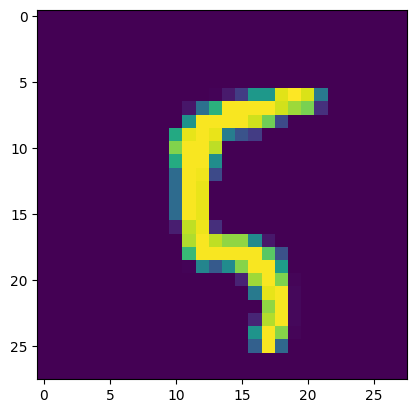

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

img_id = 100

print('Image Shape: ',x_train[img_id].shape)
print('Image Label Array: ', y_train[img_id], '\nImage Label Shape: ',y_train[img_id].shape, '\nImage Label: ',np.argmax(y_train[img_id]))

plt.imshow(x_train[img_id].reshape(28, 28))
plt.show()

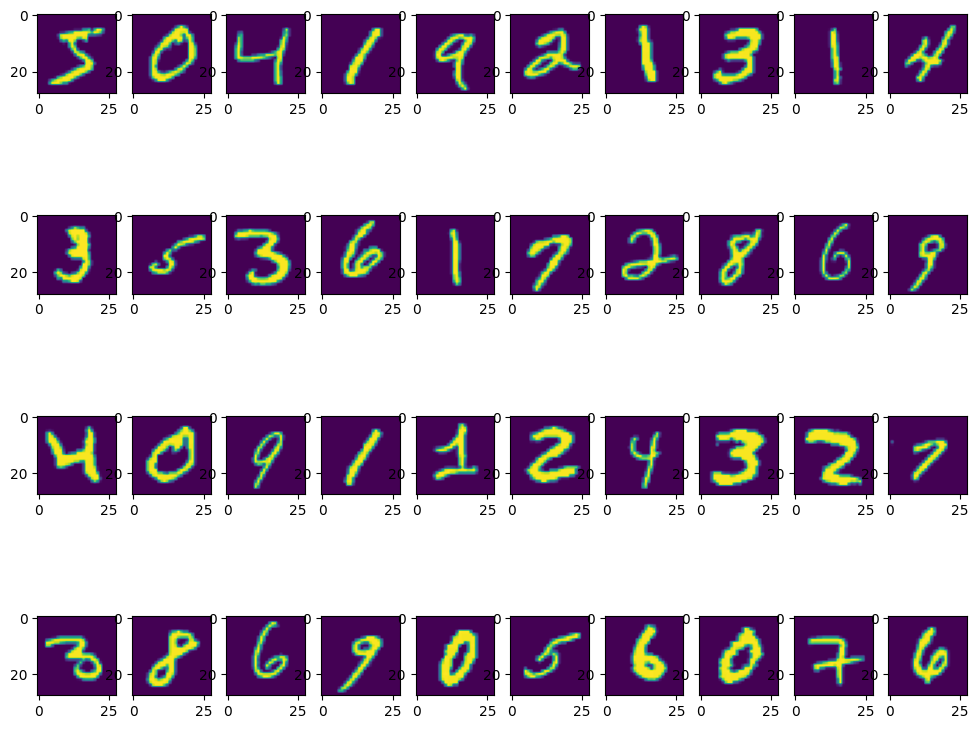

In [8]:
plt.figure(figsize=(12, 10))
x, y =10, 4

for i in range(40):
    plt.subplot(y, x, i + 1)
    plt.imshow(x_train[i].reshape((28, 28)))
plt.show()

## Make Model

In [9]:
from tensorflow.keras import layers

input_shape = (28, 28, 1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_of_classes, activation="softmax")
    ]
)

model.summary()

2023-09-27 00:33:11.442434: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-27 00:33:11.474375: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-27 00:33:11.474427: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-27 00:33:11.479637: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

### Set Training Parameters

In [11]:
batch_size = 126
epochs = 15

model.compile(loss="categorical_crossentropy",
              optimizer="SGD",
              metrics=["accuracy"])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)


Epoch 1/15


2023-09-27 00:35:48.953028: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8700
2023-09-27 00:35:51.699625: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-09-27 00:35:51.724224: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x558c2dad7c30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-27 00:35:51.724277: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2023-09-27 00:35:51.966842: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


429/429 [==============================] - 11s 8ms/step - loss: 2.9275 - accuracy: 0.7156 - val_loss: 0.1908 - val_accuracy: 0.9465
Epoch 2/15
429/429 [==============================] - 3s 7ms/step - loss: 0.3921 - accuracy: 0.8797 - val_loss: 0.1347 - val_accuracy: 0.9640
Epoch 3/15
429/429 [==============================] - 3s 7ms/step - loss: 0.3087 - accuracy: 0.9041 - val_loss: 0.1645 - val_accuracy: 0.9572
Epoch 4/15
429/429 [==============================] - 3s 8ms/step - loss: 0.2685 - accuracy: 0.9181 - val_loss: 0.0865 - val_accuracy: 0.9743
Epoch 5/15
429/429 [==============================] - 3s 7ms/step - loss: 0.2425 - accuracy: 0.9261 - val_loss: 0.0880 - val_accuracy: 0.9765
Epoch 6/15
429/429 [==============================] - 4s 8ms/step - loss: 0.2263 - accuracy: 0.9303 - val_loss: 0.0892 - val_accuracy: 0.9735
Epoch 7/15
429/429 [==============================] - 3s 8ms/step - loss: 0.2174 - accuracy: 0.9331 - val_loss: 0.0744 - val_accuracy: 0.9785
Epoch 8/15
429/4

### Analyze Training Process

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


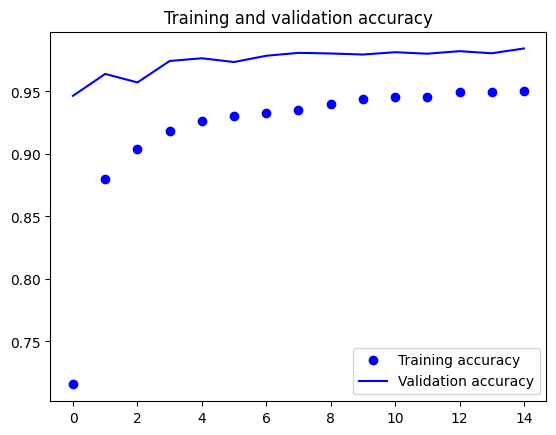

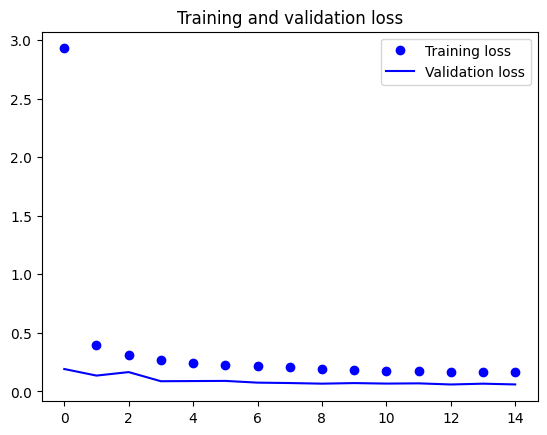

In [12]:
print(history.history.keys())
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(list(range(epochs)), train_accuracy, 'bo', label='Training accuracy')
plt.plot(list(range(epochs)), val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(list(range(epochs)), train_loss, 'bo', label='Training loss')
plt.plot(list(range(epochs)), val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Test and Evaluate

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0654369592666626
Test accuracy: 0.9782999753952026


## Sample Prediction

Image shape: (28, 28, 1)
True Image Label Array: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 
True Image Label Shape: (10,) 
True Image Label: 7


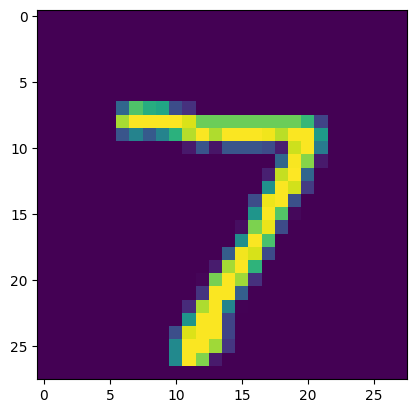

1/1 [==============================] - 0s 416ms/step
Predicted Image Label Array: ['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00'] 
Predicted Image Label Shape: (1, 10) 
Predicted Image Label: 7


In [14]:
img_id = 0

sample_test_image = x_test[img_id]
sample_test_label = y_test[img_id]

print('Image shape:', sample_test_image.shape)
print('True Image Label Array:', sample_test_label,
      '\nTrue Image Label Shape:', sample_test_label.shape,
      '\nTrue Image Label:', np.argmax(sample_test_label))
plt.imshow(sample_test_image.reshape(28, 28))
plt.show()



prediction = model.predict(sample_test_image.reshape(1, 28, 28, 1))

print('Predicted Image Label Array:', ['{0:0.2f}'.format(i) for i in prediction[0]],
      '\nPredicted Image Label Shape:', prediction.shape,
      '\nPredicted Image Label:', np.argmax(prediction))